### IE6600 Computation and Visualization for Analytics
#### Spring 2025
#### **Project 1**
#### Group 2
##### Names:
- Stephy Romichan
- Gagan Yadav
- Meghana Rao

##### Submitted to: Prof Sivarit Sultornsanee
##### Submission Date: Feb 15, 2025

In [923]:
import pandas as pd

In [924]:
df = pd.read_csv('Supply_Chain_Shipment_Pricing_Dataset.csv')  # Replace 'dataset.csv' with the actual filename

In [925]:
print(df.head())

   id project code            pq # po / so # asn/dn #        country managed by  fulfill via vendor inco term shipment mode pq first sent to client date po sent to vendor date scheduled delivery date delivered to client date delivery recorded date product group sub classification                                             vendor                                   item description                        molecule/test type      brand   dosage      dosage form  unit of measure (per pack)  line item quantity  line item value  pack price  unit price             manufacturing site  first line designation weight (kilograms) freight cost (usd)  line item insurance (usd)
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured                2-Jun-06                 2-Jun-06               2-Jun-06          HRDT           HIV test                        RANBAXY Fine Chemicals LT

In [926]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [927]:
print(df.describe())

                 id  unit of measure (per pack)  line item quantity  line item value    pack price    unit price  line item insurance (usd)
count  10324.000000                10324.000000        10324.000000     1.032400e+04  10324.000000  10324.000000               10037.000000
mean   51098.968229                   77.990895        18332.534870     1.576506e+05     21.910241      0.611701                 240.117626
std    31944.332496                   76.579764        40035.302961     3.452921e+05     45.609223      3.275808                 500.190568
min        1.000000                    1.000000            1.000000     0.000000e+00      0.000000      0.000000                   0.000000
25%    12795.750000                   30.000000          408.000000     4.314593e+03      4.120000      0.080000                   6.510000
50%    57540.500000                   60.000000         3000.000000     3.047147e+04      9.300000      0.160000                  47.040000
75%    83648.250000 

In [928]:
print(df.isnull().sum())

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

In [929]:
print(df.duplicated().sum())

0


#### Cleaning and handling missing values

In [931]:
df = df.drop_duplicates()

In [932]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [933]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [934]:
for col in cat_cols:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

#### Exploratory df Analysis

##### Pie chart to analyse the different shipment modes

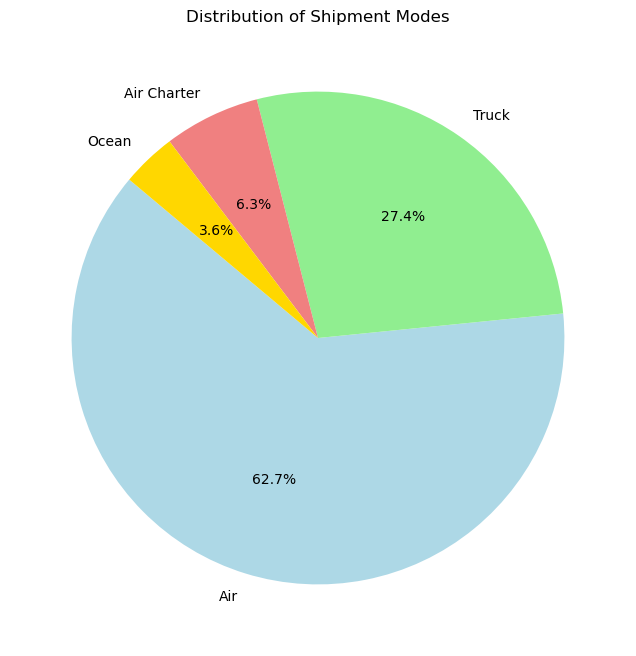

In [937]:
import matplotlib.pyplot as plt

# Clean column names (if needed)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Count occurrences of each shipment mode
shipment_mode_counts = df['shipment_mode'].value_counts()

# Pie Chart: Shipment Mode Distribution
plt.figure(figsize=(8, 8))
plt.pie(shipment_mode_counts, labels=shipment_mode_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
plt.title("Distribution of Shipment Modes")
plt.show()


##### Top 10 countries with the most shipments

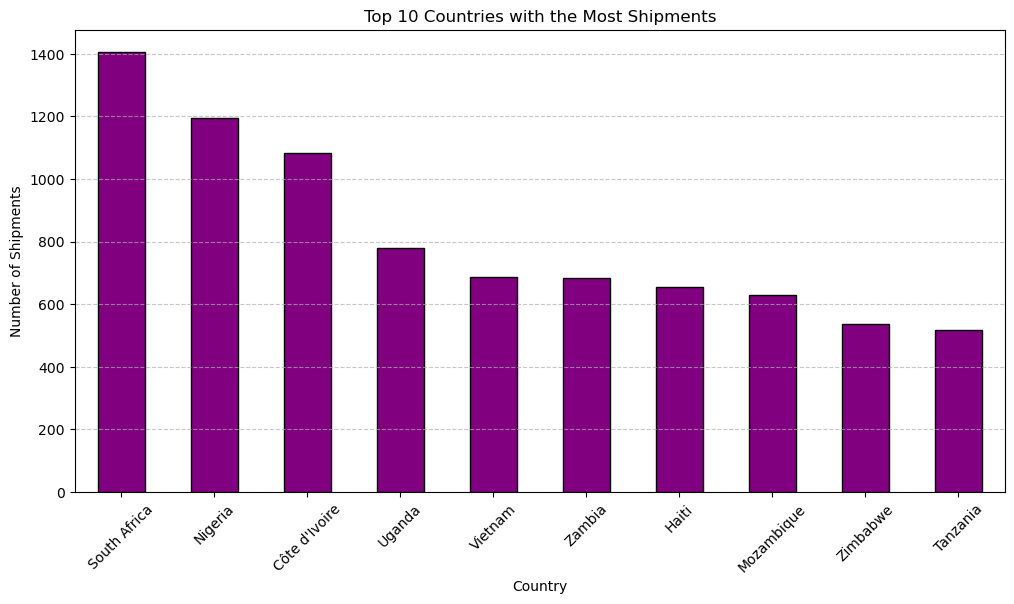

In [939]:
import matplotlib.pyplot as plt
top_countries = df['country'].value_counts().nlargest(10)

# Bar Chart: Shipments per Country
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Number of Shipments")
plt.title("Top 10 Countries with the Most Shipments")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Bar chart of the different product groups

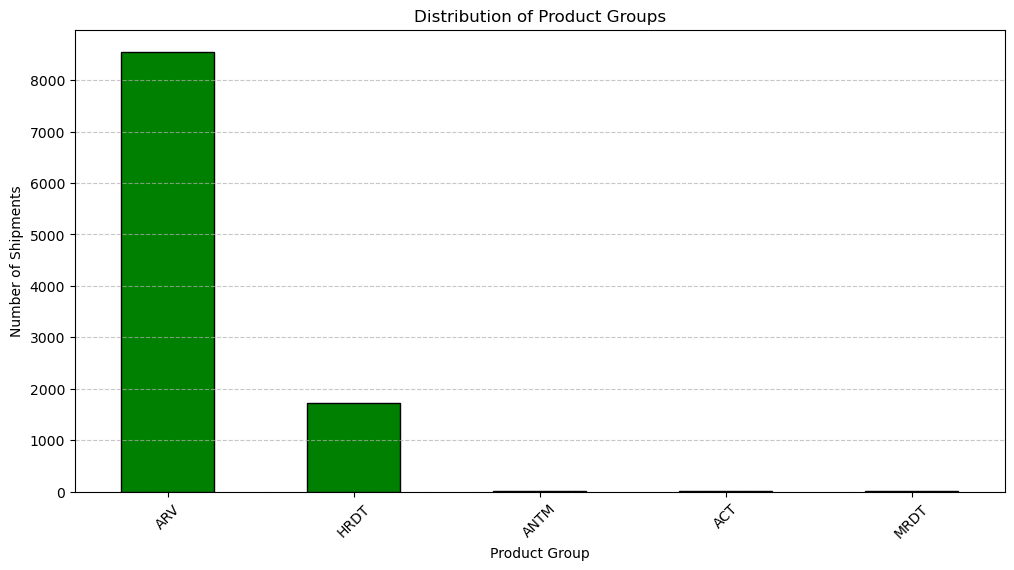

In [941]:
import matplotlib.pyplot as plt
product_group_counts = df['product_group'].value_counts()

# Bar Chart: Product Group Distribution
plt.figure(figsize=(12, 6))
product_group_counts.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel("Product Group")
plt.ylabel("Number of Shipments")
plt.title("Distribution of Product Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Histogram of distribution of shipment weights

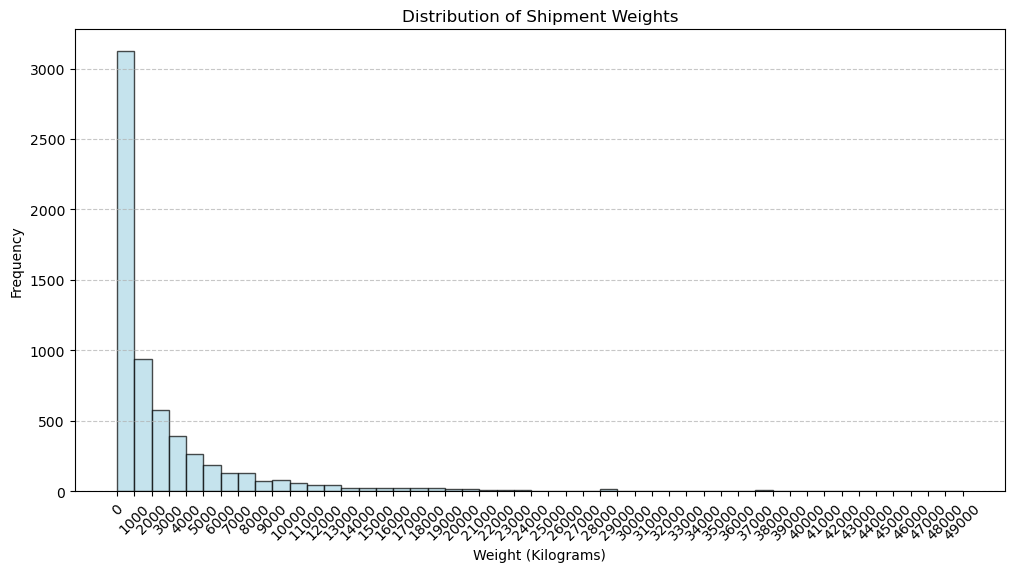

In [944]:
import numpy as np
df['weight_(kilograms)'] = pd.to_numeric(df['weight_(kilograms)'], errors='coerce')

# Define bin edges from 0 to 200,000 with equal intervals
bins = np.arange(0, 50000, 1000)  # Bins of 10,000 kg each

# Histogram: Distribution of Shipment Weights
plt.figure(figsize=(12, 6))
plt.hist(df['weight_(kilograms)'].dropna(), bins=bins, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Frequency")
plt.title("Distribution of Shipment Weights")
plt.xticks(bins, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Trend of total shipment value over time

C:\Users\steph\AppData\Local\Temp\ipykernel_37548\144960819.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'], errors='coerce')


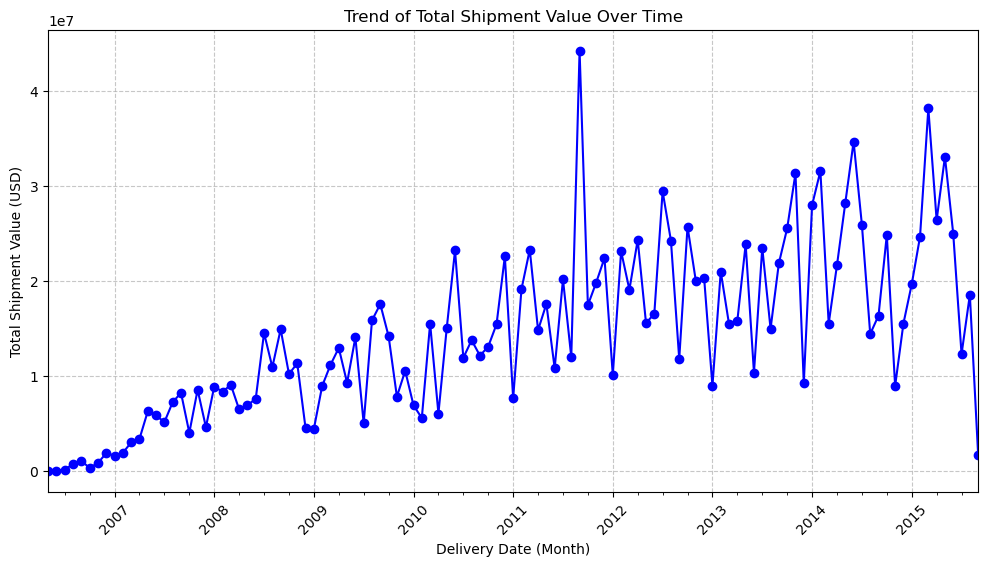

In [946]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert delivery date to datetime format
df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'], errors='coerce')

# Aggregate total shipment value by delivery date
shipment_trend = df.groupby(df['delivered_to_client_date'].dt.to_period("M"))['line_item_value'].sum()

# Line Chart: Shipment Value Over Time
plt.figure(figsize=(12, 6))
shipment_trend.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.xlabel("Delivery Date (Month)")
plt.ylabel("Total Shipment Value (USD)")
plt.title("Trend of Total Shipment Value Over Time")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


##### Relationship of freight cost and shipment weight

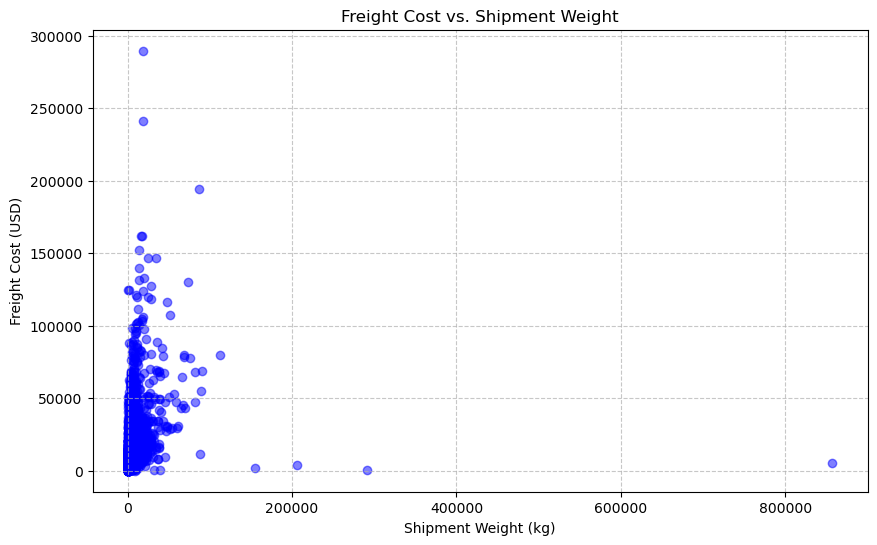

In [948]:
import matplotlib.pyplot as plt
df['weight_(kilograms)'] = pd.to_numeric(df['weight_(kilograms)'], errors='coerce')
df['freight_cost_(usd)'] = pd.to_numeric(df['freight_cost_(usd)'], errors='coerce')

# Scatter Plot: Freight Cost vs. Weight
plt.figure(figsize=(10, 6))
plt.scatter(df['weight_(kilograms)'], df['freight_cost_(usd)'], alpha=0.5, color='blue')
plt.xlabel("Shipment Weight (kg)")
plt.ylabel("Freight Cost (USD)")
plt.title("Freight Cost vs. Shipment Weight")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


##### Heatmap of shipment data

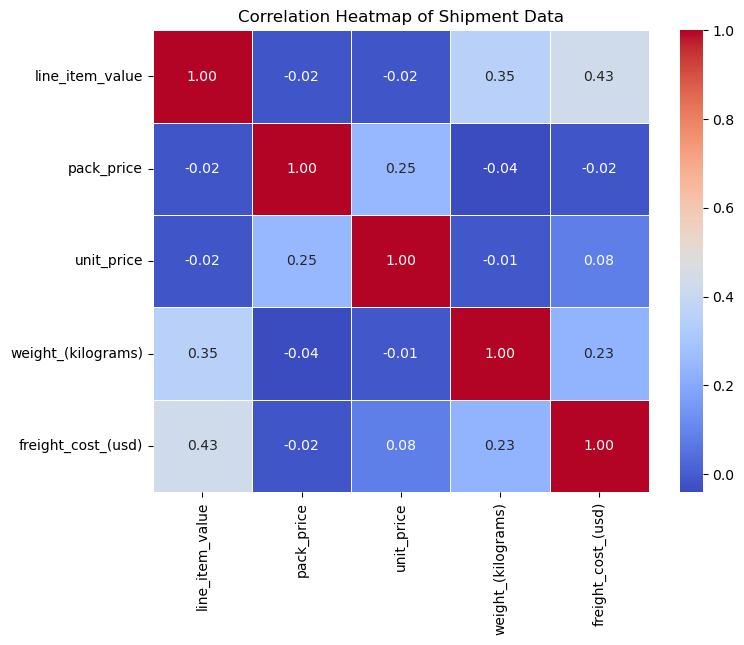

In [950]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_columns = ['line_item_value', 'pack_price', 'unit_price', 'weight_(kilograms)', 'freight_cost_(usd)']
df_corr = df[corr_columns].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Heatmap: Correlation Between Financial & Logistical Factors
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Shipment Data")
plt.show()


##### Box plot of distribution of freight code

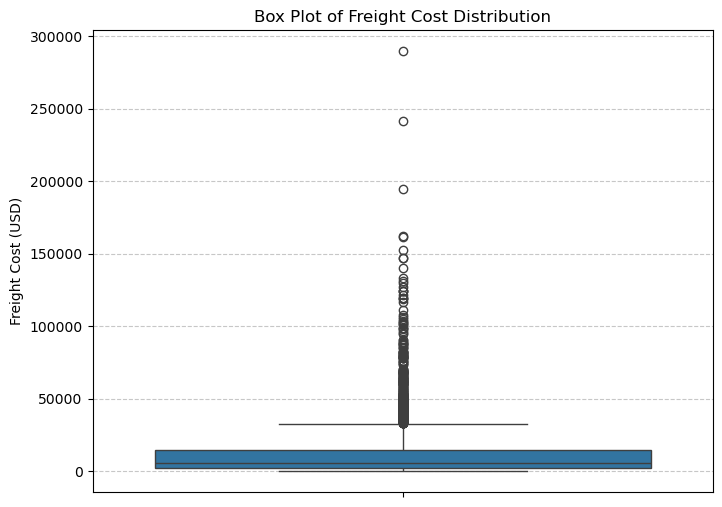

In [952]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['freight_cost_(usd)'])
plt.ylabel("Freight Cost (USD)")
plt.title("Box Plot of Freight Cost Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Pair plot to find patterns between unit price, freight cost, pack price, and weight

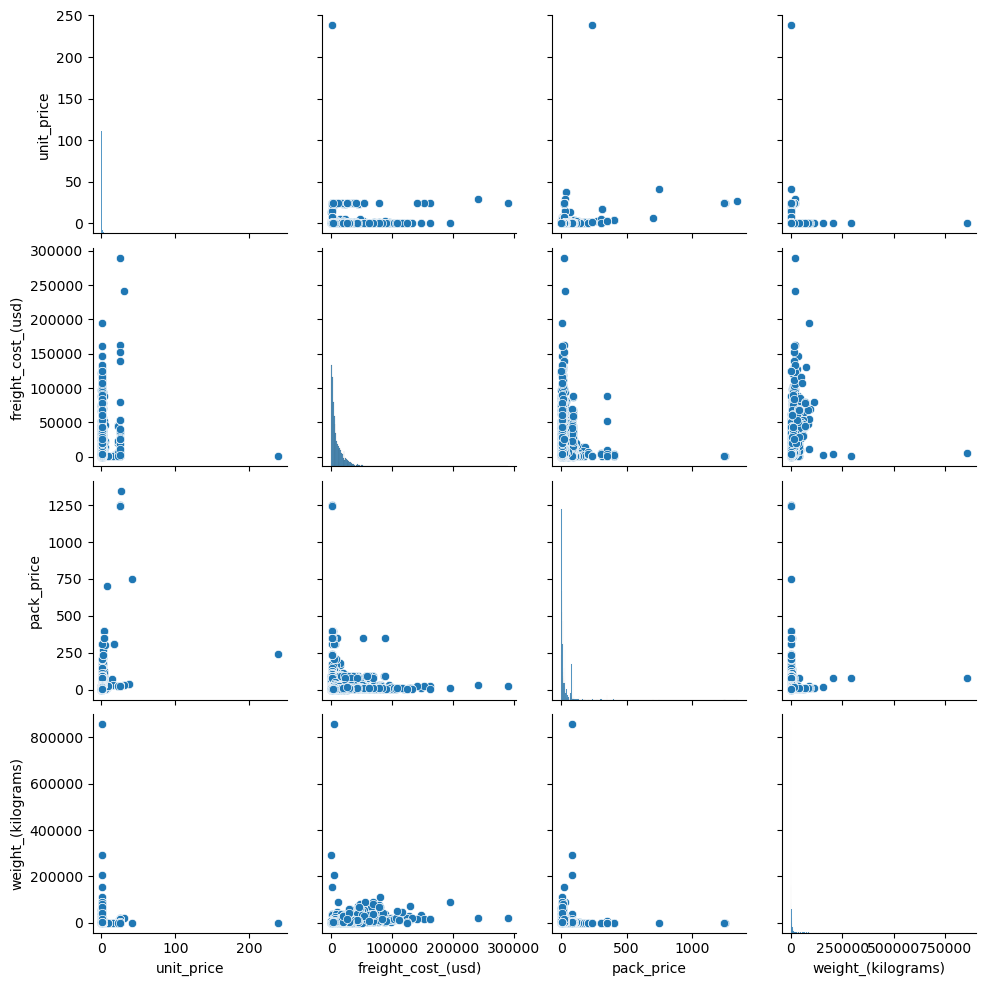

In [954]:
sns.pairplot(df[['unit_price', 'freight_cost_(usd)', 'pack_price', 'weight_(kilograms)']])
plt.show()


##### Top 10 most frequent brands in the shipment data

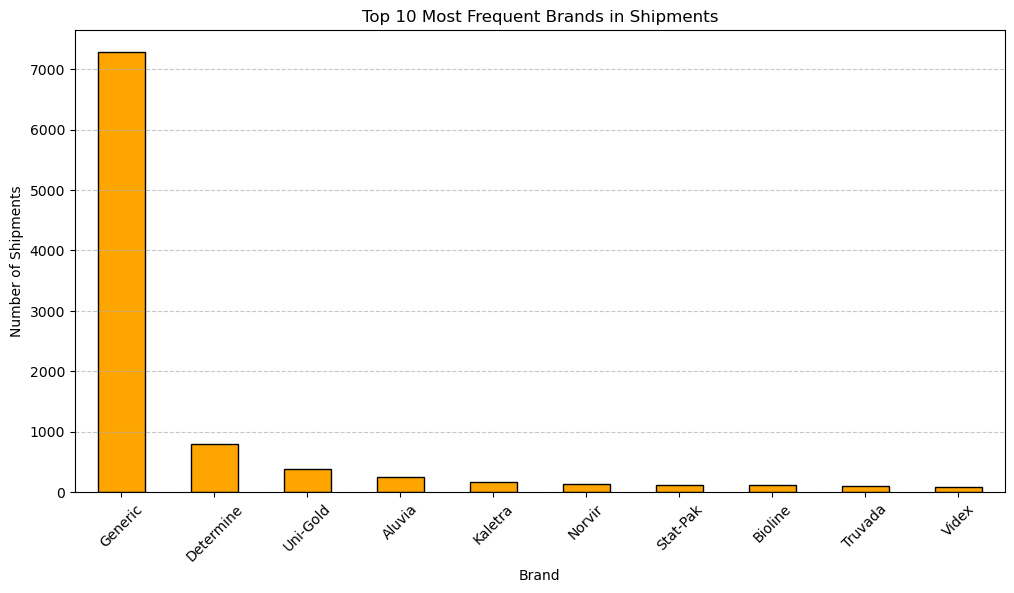

In [956]:
import matplotlib.pyplot as plt
top_brands = df['brand'].value_counts().nlargest(10)

# Bar Chart: Top 10 Brands
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Brand")
plt.ylabel("Number of Shipments")
plt.title("Top 10 Most Frequent Brands in Shipments")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Bar chart distribution of dosage forms

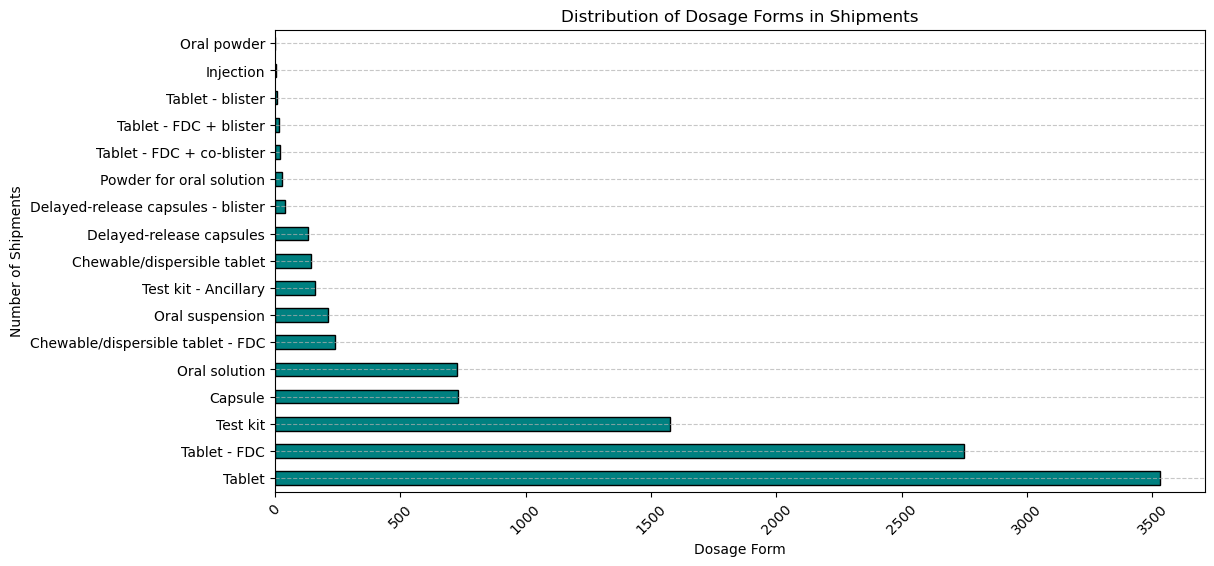

In [958]:
import matplotlib.pyplot as plt
dosage_form_counts = df['dosage_form'].value_counts()
plt.figure(figsize=(12, 6))
dosage_form_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel("Dosage Form")
plt.ylabel("Number of Shipments")
plt.title("Distribution of Dosage Forms in Shipments")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [959]:
df.head()

,id,project_code,pq_#,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,300mg,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,240.117626
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,240.117626
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,2006-08-27,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,240.117626
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,2006-09-01,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,240.117626
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,2006-08-11,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,240.117626


## Advanced Analysis

In [961]:
import pandas as pd
import numpy as np


# Replace "Pre-PQ Process" and "Date Not Captured" with NaN
df['po_sent_to_vendor_date'] = df['po_sent_to_vendor_date'].replace(["Pre-PQ Process", "Date Not Captured"], np.nan)

# Convert to datetime
df['pq_first_sent_to_client_date'] = pd.to_datetime(df['pq_first_sent_to_client_date'], errors='coerce')
df['po_sent_to_vendor_date'] = pd.to_datetime(df['po_sent_to_vendor_date'], errors='coerce')
df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'], errors='coerce')
df['delivery_recorded_date'] = pd.to_datetime(df['delivery_recorded_date'], errors='coerce')

# Create flag columns for missing dates
df['pq_date_missing'] = df['pq_first_sent_to_client_date'].isna().astype(int)
df['po_date_missing'] = df['po_sent_to_vendor_date'].isna().astype(int)

# Fill missing dates with a placeholder (e.g., far future date or far past date)
# This ensures we don't lose rows but also don't introduce bias
far_future_date = pd.to_datetime('2100-01-01')
# Fill missing dates with a far future date
df['pq_first_sent_to_client_date'] = df['pq_first_sent_to_client_date'].fillna(far_future_date)
df['po_sent_to_vendor_date'] = df['po_sent_to_vendor_date'].fillna(far_future_date)

# Check the number of valid dates
print("Valid dates in pq_first_sent_to_client_date:", df['pq_first_sent_to_client_date'].notna().sum())
print("Valid dates in po_sent_to_vendor_date:", df['po_sent_to_vendor_date'].notna().sum())

Valid dates in pq_first_sent_to_client_date: 10324
Valid dates in po_sent_to_vendor_date: 10324


C:\Users\steph\AppData\Local\Temp\ipykernel_37548\3034053147.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pq_first_sent_to_client_date'] = pd.to_datetime(df['pq_first_sent_to_client_date'], errors='coerce')
C:\Users\steph\AppData\Local\Temp\ipykernel_37548\3034053147.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'], errors='coerce')
C:\Users\steph\AppData\Local\Temp\ipykernel_37548\3034053147.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_recorded_date'] = pd.to_da

In [962]:
df.head()

,id,project_code,pq_#,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),pq_date_missing,po_date_missing
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,300mg,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,240.117626,1,1
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,240.117626,1,1
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2100-01-01,2100-01-01,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,240.117626,1,1
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,240.117626,1,1
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,240.117626,1,1


In [963]:
# Calculate delivery delay (difference between delivered_to_client_date and scheduled_delivery_date)
df['delivery_delay'] = (df['delivered_to_client_date'] - df['scheduled_delivery_date']).dt.days

# Calculate order lead time (difference between po_sent_to_vendor_date and pq_first_sent_to_client_date)
# Only calculate if both dates are available (not far_future_date)
df['order_lead_time'] = np.where(
    (df['pq_first_sent_to_client_date'] != far_future_date) & (df['po_sent_to_vendor_date'] != far_future_date),
    (df['po_sent_to_vendor_date'] - df['pq_first_sent_to_client_date']).dt.days,
    np.nan  # Set to NaN if either date is missing
)

# Check the new features
print(df[['pq_first_sent_to_client_date', 'po_sent_to_vendor_date', 'delivery_delay', 'order_lead_time']].head())

  pq_first_sent_to_client_date po_sent_to_vendor_date  delivery_delay  order_lead_time
0                   2100-01-01             2100-01-01               0              NaN
1                   2100-01-01             2100-01-01               0              NaN
2                   2100-01-01             2100-01-01               0              NaN
3                   2100-01-01             2100-01-01               0              NaN
4                   2100-01-01             2100-01-01               0              NaN


In [964]:
df.head()

,id,project_code,pq_#,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),pq_date_missing,po_date_missing,delivery_delay,order_lead_time
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,300mg,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,240.117626,1,1,0,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,240.117626,1,1,0,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2100-01-01,2100-01-01,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,240.117626,1,1,0,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,240.117626,1,1,0,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,2100-01-01,2100-01-01,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,240.117626,1,1,0,NaN


In [965]:
# Fill missing values in 'weight_(kilograms)' and 'freight_cost_(usd)' with their medians
# Convert specific columns to numeric, coercing errors to NaN
df['weight_(kilograms)'] = pd.to_numeric(df['weight_(kilograms)'], errors='coerce')
df['freight_cost_(usd)'] = pd.to_numeric(df['freight_cost_(usd)'], errors='coerce')

df = df.fillna({
    'weight_(kilograms)': df['weight_(kilograms)'].median(),
    'freight_cost_(usd)': df['freight_cost_(usd)'].median()
})

# Verify imputation
print(df[['weight_(kilograms)', 'freight_cost_(usd)']].isna().sum())

weight_(kilograms)    0
freight_cost_(usd)    0
dtype: int64


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            10324 non-null  int64         
 1   project_code                  10324 non-null  object        
 2   pq_#                          10324 non-null  object        
 3   po_/_so_#                     10324 non-null  object        
 4   asn/dn_#                      10324 non-null  object        
 5   country                       10324 non-null  object        
 6   managed_by                    10324 non-null  object        
 7   fulfill_via                   10324 non-null  object        
 8   vendor_inco_term              10324 non-null  object        
 9   shipment_mode                 10324 non-null  object        
 10  pq_first_sent_to_client_date  10324 non-null  datetime64[ns]
 11  po_sent_to_vendor_date      

In [967]:
# Correct the typo in the column name
categorical_cols = [
    ''
    'country', 
    'managed_by', 
    'shipment_mode',
    'fulfill_via',
    'product_group', 
    'sub_classification', 
    'vendor',
    'brand',
    'manufacturing_site',
    'molecule/test_type'
]
columns_to_drop = ['id', 'project_code', 'pq_#', 'po_/_so_#', 'vendor_inco_term','asn/dn_#','pq_first_sent_to_client_date','po_sent_to_vendor_date','scheduled_delivery_date','delivered_to_client_date','delivery_recorded_date','item_description','dosage','dosage_form','order_lead_time']
# Perform one-hot encoding
df.drop(columns=columns_to_drop, inplace=True)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the encoded DataFrame
print(df_encoded.head())

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  pack_price  unit_price  first_line_designation  weight_(kilograms)  freight_cost_(usd)  line_item_insurance_(usd)  pq_date_missing  po_date_missing  delivery_delay  country_Angola  country_Belize  country_Benin  country_Botswana  country_Burkina Faso  country_Burundi  country_Cameroon  country_Congo, DRC  country_Côte d'Ivoire  country_Dominican Republic  country_Ethiopia  country_Ghana  country_Guatemala  country_Guinea  country_Guyana  country_Haiti  country_Kazakhstan  country_Kenya  country_Kyrgyzstan  country_Lebanon  country_Lesotho  country_Liberia  country_Libya  country_Malawi  country_Mali  country_Mozambique  country_Namibia  country_Nigeria  country_Pakistan  country_Rwanda  country_Senegal  country_Sierra Leone  country_South Africa  country_South Sudan  country_Sudan  country_Swaziland  country_Tanzania  country_Togo  country_Uganda  country_Vietnam  country_Zambia  country_Zimbabwe  \
0                  

In [968]:
# Define features (X) and target (y)
print(df_encoded.isnull().sum())
X = df_encoded.drop(columns=['line_item_value'])  # Features
y = df_encoded['line_item_value']  # Target (shipment pricing)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

unit_of_measure_(per_pack)                          0
line_item_quantity                                  0
line_item_value                                     0
pack_price                                          0
unit_price                                          0
                                                   ..
molecule/test_type_Saquinavir                       0
molecule/test_type_Stavudine                        0
molecule/test_type_Sulfadoxine/Pyrimethamine        0
molecule/test_type_Tenofovir Disoproxil Fumarate    0
molecule/test_type_Zidovudine                       0
Length: 361, dtype: int64


In [969]:
import pandas as pd
from sklearn.preprocessing import StandardScaler




# Step 3: Ensure consistency between X_train and X_test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Check the encoded data
print(X_train.head())
print(X_test.head())

# Step 3: Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the scaled data
print(X_train[:5])
print(X_test[:5])


       unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  first_line_designation  weight_(kilograms)  freight_cost_(usd)  line_item_insurance_(usd)  pq_date_missing  po_date_missing  delivery_delay  country_Angola  country_Belize  country_Benin  country_Botswana  country_Burkina Faso  country_Burundi  country_Cameroon  country_Congo, DRC  country_Côte d'Ivoire  country_Dominican Republic  country_Ethiopia  country_Ghana  country_Guatemala  country_Guinea  country_Guyana  country_Haiti  country_Kazakhstan  country_Kenya  country_Kyrgyzstan  country_Lebanon  country_Lesotho  country_Liberia  country_Libya  country_Malawi  country_Mali  country_Mozambique  country_Namibia  country_Nigeria  country_Pakistan  country_Rwanda  country_Senegal  country_Sierra Leone  country_South Africa  country_South Sudan  country_Sudan  country_Swaziland  country_Tanzania  country_Togo  country_Uganda  country_Vietnam  country_Zambia  country_Zimbabwe  managed_by_Haiti Field Office  \
3

In [970]:
import numpy as np

# Check shape of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Check mean and standard deviation of scaled features
print("X_train mean:", np.mean(X_train, axis=0))
print("X_train std:", np.std(X_train, axis=0))
print("X_test mean:", np.mean(X_test, axis=0))
print("X_test std:", np.std(X_test, axis=0))

X_train shape: (8259, 360)
X_test shape: (2065, 360)
X_train mean: [ 6.05722842e-17 -4.90385470e-17  7.23748730e-17 -5.32326332e-17
 -9.30764526e-17  9.57111991e-18  1.50288091e-17  3.06490919e-18
 -6.90948825e-17  2.86058191e-17 -1.86583068e-17 -1.67763450e-17
  1.45717612e-17 -3.65638289e-18 -2.79605750e-18 -1.75022446e-17
  4.52746234e-17  3.93598864e-17 -7.03316003e-17 -8.74305673e-17
  2.47343548e-17  1.36576655e-17 -4.18333219e-17  1.61311010e-18
  0.00000000e+00 -2.41966515e-18 -7.44181458e-17 -1.12917707e-18
  4.03277524e-18  4.24785659e-18  6.99014376e-18 -8.89899070e-18
  4.83933029e-18 -2.22340342e-17 -4.94687097e-18 -2.11317423e-17
  5.75342601e-17  3.33376087e-18  2.21466574e-17 -2.21533787e-17
  6.78581648e-17 -9.32915340e-18  1.39802875e-18 -5.32326332e-17
  9.67866059e-18  2.64550056e-17 -1.92497805e-17 -1.82819144e-17
 -3.44130154e-18  3.51658001e-17 -2.01101059e-17 -1.13993114e-17
  1.25392425e-16  0.00000000e+00 -3.85855935e-16 -4.10805372e-17
 -1.43029095e-17  1.548

In [971]:
# Check for missing values in X_train
print(np.isnan(X_train).sum())

# Check for missing values in X_test
print(np.isnan(X_test).sum())

0
0


In [972]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 79614.54931585077


In [973]:
print("Mean of y_test:", y_test.mean())
print("Standard deviation of y_test:", y_test.std())

Mean of y_test: 151549.1806440678
Standard deviation of y_test: 334098.0051392267


## Interpretation of RMSE in Context:
RMSE Relative to Mean:

The RMSE (79,614.55) is approximately 52.5% of the mean of y_test (151,549.18).
This means the average prediction error is about half the average value of the target variable. This is relatively high, indicating that the model's predictions are not very accurate.

### RMSE Relative to Standard Deviation:
The RMSE (79,614.55) is approximately 23.8% of the standard deviation of y_test (334,098.01).This suggests that the model's predictions are somewhat better than simply predicting the mean (which would result in an RMSE close to the standard deviation). However, there is still significant room for improvement.

### What This Means for the Model:
The model is better than a naive baseline (predicting the mean), but it is still not performing well enough for practical use.The relatively high RMSE indicates that the model is struggling to capture the underlying patterns in the data.